In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('Final dataset - Katerina.csv', encoding='latin1')

In [185]:
df.shape

(7345, 25)

In [186]:
df.head()

,Opportunity ID,Total Opportunities,Type,Effective Date,Contract_Duration (Months),Market,Usage Cycle (Months),Open Opportunities (Inclusive),Opportunity Subtype,Business Model,...,Pricing Tier,Usage,Region,Billing State/Province,Account Type,Contribution Percentage,Payment Terms (Text),Payment Method,Employees,Opportunity Status
0,959,6.0,Platform,4/1/2022,12.0,Fitness Classes,36.0,0.0,Upgrade,SVOD,...,Tier 1,NaN,Americas West,Washington,Active Prospect,0.65,Net 60,ACH,NaN,Closed Won
1,94,3.0,Play,1/11/2022,12.0,Other,12.0,0.0,Upgrade,Other,...,Tier 2,NaN,Americas West,Washington,Inactive Prospect,0.82,Net 60,ACH,NaN,Closed Won
2,2928,19.0,Platform,9/20/2022,12.0,Other,1.0,0.0,Auto-Renewal,AVOD,...,Tier 1,NaN,Americas West,Washington,Customer,0.87,Due Upon Receipt,NaN,NaN,Closed Won
3,4314,19.0,Platform,9/20/2023,12.0,Other,1.0,0.0,Auto-Renewal,AVOD,...,Tier 1,NaN,Americas West,Washington,Customer,0.87,Due Upon Receipt,NaN,NaN,Closed Won
4,6643,19.0,NaN,9/20/2024,12.0,Other,1.0,0.0,Auto-Renewal,AVOD,...,Tier 1,NaN,Americas West,Washington,Customer,0.87,Due Upon Receipt,NaN,NaN,Closed Won


In [187]:
df.columns.values

array(['Opportunity ID', 'Total Opportunities', 'Type', 'Effective Date',
       'Contract_Duration (Months)', 'Market', 'Usage Cycle (Months)',
       'Open Opportunities (Inclusive)', 'Opportunity Subtype',
       'Business Model', 'Age', 'ACV', 'Total Discount', 'MRR',
       'Delta MRR', 'Pricing Tier', 'Usage', 'Region',
       'Billing State/Province', 'Account Type',
       'Contribution Percentage', 'Payment Terms (Text)',
       'Payment Method', 'Employees', 'Opportunity Status'], dtype=object)

In [188]:


import pandas as pd

df = pd.read_csv("Final dataset - Katerina.csv", encoding='ISO-8859-1')

column_mapping = {
    "Opportunity ID": "deal_id",
    "Total Opportunities": "total_deals",
    "Type": "deal_type",
    "Effective Date": "deal_start_date",
    "Contract_Duration (Months)": "contract_length",
    "Market": "industry",
    "Usage Cycle (Months)": "usage_cycle",
    "Open Opportunities (Inclusive)": "active_deals",
    "Opportunity Subtype": "deal_subtype",
    "Business Model": "business_model",
    "Age": "account_age",
    "ACV": "contract_value",
    "Total Discount": "total_discount",
    "MRR": "mrr",
    "Delta MRR": "change_in_mrr",
    "Pricing Tier": "pricing_category",
    "Usage": "average_usage",
    "Region": "geographic_region",
    "Billing State/Province": "billing_location",
    "Account Type": "customer_status",
    "Contribution Percentage": "contribution_percent",
    "Payment Terms (Text)": "payment_terms",
    "Payment Method": "payment_method",
    "Employees": "employee_count",
    "Opportunity Status": "target"
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

# Save to a new CSV file
output_path = "dataset.csv"
df.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")


Dataset saved to dataset.csv


In [189]:
df = pd.read_csv("dataset.csv", encoding='ISO-8859-1')

df.columns.values

array(['deal_id', 'total_deals', 'deal_type', 'deal_start_date',
       'contract_length', 'industry', 'usage_cycle', 'active_deals',
       'deal_subtype', 'business_model', 'account_age', 'contract_value',
       'total_discount', 'mrr', 'change_in_mrr', 'pricing_category',
       'average_usage', 'geographic_region', 'billing_location',
       'customer_status', 'contribution_percent', 'payment_terms',
       'payment_method', 'employee_count', 'target'], dtype=object)

In [190]:
df.head()

,deal_id,total_deals,deal_type,deal_start_date,contract_length,industry,usage_cycle,active_deals,deal_subtype,business_model,...,pricing_category,average_usage,geographic_region,billing_location,customer_status,contribution_percent,payment_terms,payment_method,employee_count,target
0,959,6.0,Platform,4/1/2022,12.0,Fitness Classes,36.0,0.0,Upgrade,SVOD,...,Tier 1,NaN,Americas West,Washington,Active Prospect,0.65,Net 60,ACH,NaN,Closed Won
1,94,3.0,Play,1/11/2022,12.0,Other,12.0,0.0,Upgrade,Other,...,Tier 2,NaN,Americas West,Washington,Inactive Prospect,0.82,Net 60,ACH,NaN,Closed Won
2,2928,19.0,Platform,9/20/2022,12.0,Other,1.0,0.0,Auto-Renewal,AVOD,...,Tier 1,NaN,Americas West,Washington,Customer,0.87,Due Upon Receipt,NaN,NaN,Closed Won
3,4314,19.0,Platform,9/20/2023,12.0,Other,1.0,0.0,Auto-Renewal,AVOD,...,Tier 1,NaN,Americas West,Washington,Customer,0.87,Due Upon Receipt,NaN,NaN,Closed Won
4,6643,19.0,NaN,9/20/2024,12.0,Other,1.0,0.0,Auto-Renewal,AVOD,...,Tier 1,NaN,Americas West,Washington,Customer,0.87,Due Upon Receipt,NaN,NaN,Closed Won


In [191]:
df.dtypes

deal_id                  object
total_deals             float64
deal_type                object
deal_start_date          object
contract_length         float64
industry                 object
usage_cycle             float64
active_deals            float64
deal_subtype             object
business_model           object
account_age             float64
contract_value          float64
total_discount          float64
mrr                     float64
change_in_mrr           float64
pricing_category         object
average_usage           float64
geographic_region        object
billing_location         object
customer_status          object
contribution_percent    float64
payment_terms            object
payment_method           object
employee_count          float64
target                   object
dtype: object

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7345 entries, 0 to 7344
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   deal_id               7342 non-null   object 
 1   total_deals           7340 non-null   float64
 2   deal_type             6306 non-null   object 
 3   deal_start_date       7325 non-null   object 
 4   contract_length       7224 non-null   float64
 5   industry              7052 non-null   object 
 6   usage_cycle           7338 non-null   float64
 7   active_deals          7340 non-null   float64
 8   deal_subtype          7340 non-null   object 
 9   business_model        7033 non-null   object 
 10  account_age           7340 non-null   float64
 11  contract_value        7340 non-null   float64
 12  total_discount        7279 non-null   float64
 13  mrr                   7340 non-null   float64
 14  change_in_mrr         7338 non-null   float64
 15  pricing_category     

In [193]:
df.describe()

,total_deals,contract_length,usage_cycle,active_deals,account_age,contract_value,total_discount,mrr,change_in_mrr,average_usage,contribution_percent,employee_count
count,7340.000000,7224.000000,7338.000000,7340.000000,7340.000000,7.340000e+03,7279.000000,7340.000000,7338.000000,3638.000000,6007.000000,6889.000000
mean,9.465531,12.206811,9.826383,0.080926,380.198501,3.748504e+04,-0.021884,3289.446349,-165.874208,0.442806,0.842419,406.769197
std,4.394876,2.473143,4.631947,0.370225,361.900164,1.299207e+05,1.269307,10661.316745,5405.354535,0.679982,0.656006,1057.317824
min,1.000000,0.000000,1.000000,0.000000,0.000000,-1.200000e+01,-20.428600,0.000000,-172879.160000,0.000000,-20.430000,0.000000
25%,6.000000,12.000000,12.000000,0.000000,100.750000,1.380000e+03,0.000000,233.000000,-25.750000,0.040000,0.850000,16.000000
50%,9.000000,12.000000,12.000000,0.000000,357.000000,5.000020e+03,0.000000,545.000000,0.000000,0.200000,0.920000,38.000000
75%,13.000000,12.000000,12.000000,0.000000,406.000000,1.999250e+04,0.400000,1971.150000,0.000000,0.590000,0.960000,217.000000
max,29.000000,72.000000,36.000000,5.000000,2914.000000,3.633691e+06,1.000000,260032.790000,130005.000000,11.760000,1.000000,7570.000000


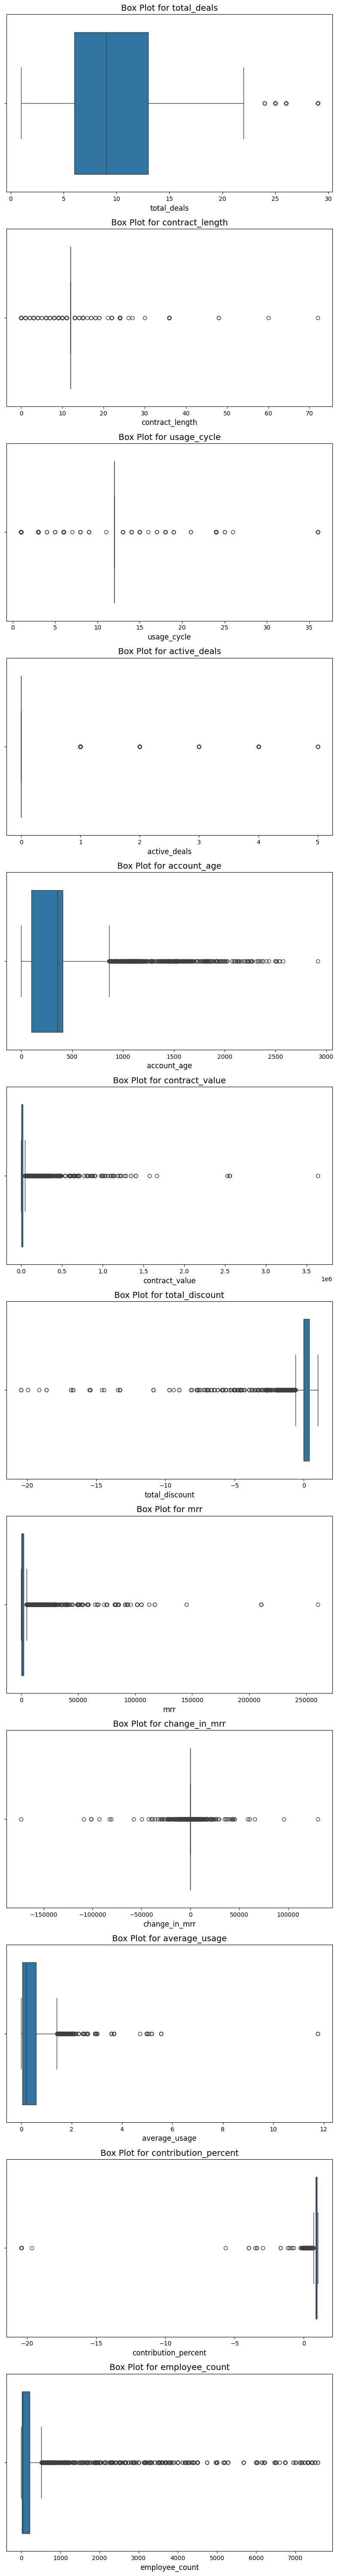

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

float_columns = df.select_dtypes(include=['float64']).columns

num_cols = len(float_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 5 * num_cols))

for i, column in enumerate(float_columns):
    sns.boxplot(x=df[column], ax=axes[i] if num_cols > 1 else axes)
    axes[i].set_title(f'Box Plot for {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


In [195]:
import pandas as pd

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75) 
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_clean = ['contribution_percent']

df= remove_outliers(df, columns_to_clean)

print(df.describe())

       total_deals  contract_length  usage_cycle  active_deals  account_age  \
count  5475.000000      5391.000000  5475.000000   5475.000000  5475.000000   
mean      9.739543        12.203858     9.740091      0.067945   359.147032   
std       4.200027         2.375078     4.563063      0.287584   344.374538   
min       1.000000         0.000000     1.000000      0.000000     0.000000   
25%       6.000000        12.000000    12.000000      0.000000    77.000000   
50%      10.000000        12.000000    12.000000      0.000000   359.000000   
75%      13.000000        12.000000    12.000000      0.000000   388.000000   
max      29.000000        72.000000    36.000000      4.000000  2573.000000   

       contract_value  total_discount            mrr  change_in_mrr  \
count    5.475000e+03     5456.000000    5475.000000    5473.000000   
mean     2.896915e+04       -0.029446    2429.907479     -15.817283   
std      1.006108e+05        1.262372    7971.768598    3963.767262   
min 

In [196]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

column_to_cap = 'contribution_percent' 
df = cap_outliers(df, column_to_cap)


In [197]:
df.shape

(5475, 25)

In [198]:
df.isnull().sum()

deal_id                    0
total_deals                0
deal_type                957
deal_start_date            2
contract_length           84
industry                 209
usage_cycle                0
active_deals               0
deal_subtype               0
business_model           217
account_age                0
contract_value             0
total_discount            19
mrr                        0
change_in_mrr              2
pricing_category           0
average_usage           2387
geographic_region          0
billing_location         181
customer_status            0
contribution_percent       0
payment_terms              0
payment_method           223
employee_count           330
target                     0
dtype: int64

In [199]:
import pandas as pd

object_columns = df.select_dtypes(include='object').columns

cardinality = df[object_columns].nunique()

print(cardinality)

deal_id              5475
deal_type               7
deal_start_date      1111
industry               11
deal_subtype            6
business_model         11
pricing_category        4
geographic_region       9
billing_location      514
customer_status         8
payment_terms           7
payment_method          8
target                  2
dtype: int64


In [200]:
df['target'] = df['target'].map({'Closed Won': 1, 'Closed Lost': 0})
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = df[col].map(df[col].value_counts())
output_path = "updated_dataset.csv"
df.to_csv(output_path, index=False)
print(df.head())

   deal_id  total_deals  deal_type  deal_start_date  contract_length  \
1        1          3.0      458.0              7.0             12.0   
2        1         19.0     3207.0              6.0             12.0   
3        1         19.0     3207.0              7.0             12.0   
4        1         19.0        NaN              8.0             12.0   
5        1         19.0     3207.0              8.0             12.0   

   industry  usage_cycle  active_deals  deal_subtype  business_model  ...  \
1     959.0         12.0           0.0           969          1753.0  ...   
2     959.0          1.0           0.0          2900          1762.0  ...   
3     959.0          1.0           0.0          2900          1762.0  ...   
4     959.0          1.0           0.0          2900          1762.0  ...   
5       NaN          1.0           0.0           565             NaN  ...   

   pricing_category  average_usage  geographic_region  billing_location  \
1              2189          

In [201]:
df.dtypes

deal_id                   int64
total_deals             float64
deal_type               float64
deal_start_date         float64
contract_length         float64
industry                float64
usage_cycle             float64
active_deals            float64
deal_subtype              int64
business_model          float64
account_age             float64
contract_value          float64
total_discount          float64
mrr                     float64
change_in_mrr           float64
pricing_category          int64
average_usage           float64
geographic_region         int64
billing_location        float64
customer_status           int64
contribution_percent    float64
payment_terms             int64
payment_method          float64
employee_count          float64
target                    int64
dtype: object

In [202]:
df.dropna(subset=['pricing_category', 'geographic_region', 'customer_status', 'payment_terms', 'usage_cycle'], inplace=True)

In [203]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 4380 samples
Test set size: 1095 samples


In [204]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

datasets = {'X_train': X_train, 'X_test': X_test}

for name, data in datasets.items():

    if isinstance(data, pd.DataFrame):
        # Drop specified columns if they exist in the DataFrame
        columns_to_drop = ['deal_id', 'deal_subtype', 'change_in_mrr', 'employee_count', 'average_usage']
        data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

        # Initialize imputer and scaler
        imputer = KNNImputer(n_neighbors=5)
        scaler = StandardScaler()

        # Handle frequency encoded categorical columns: fill missing with most frequent frequency value
        frequency_encoded_cols = ['deal_type', 'industry', 'business_model', 'payment_method']
        for col in frequency_encoded_cols:
            if col in data.columns:
                most_frequent_value = data[col].mode()[0] if not data[col].mode().empty else 0
                data[col].fillna(most_frequent_value, inplace=True)

        # Impute missing numerical columns with median
        numerical_cols = ['deal_start_date', 'contract_length', 'total_discount', 'change_in_mrr', 'employee_count']
        for col in numerical_cols:
            if col in data.columns:
                data[col].fillna(data[col].median(), inplace=True)

        # Fill specific columns with default values if they exist
        if 'contract_value' in data.columns:
            data['contract_value'].fillna(0, inplace=True)

        # Impute missing numerical columns using KNNImputer
        numerical_cols_to_impute = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if data[col].isnull().any()]
        if numerical_cols_to_impute:
            data[numerical_cols_to_impute] = imputer.fit_transform(data[numerical_cols_to_impute])

        # Scale numerical columns
        if 'contribution_percent' in data.columns:
            data[['contribution_percent']] = scaler.fit_transform(data[['contribution_percent']])

        # Check data types and missing values after imputation
        print(f"\nData Types and Missing Values After Imputation for {name}:")
        print(data.dtypes)
        print(data.isnull().sum())



Data Types and Missing Values After Imputation for X_train:
total_deals             float64
deal_type               float64
deal_start_date         float64
contract_length         float64
industry                float64
usage_cycle             float64
active_deals            float64
business_model          float64
account_age             float64
contract_value          float64
total_discount          float64
mrr                     float64
pricing_category          int64
geographic_region         int64
billing_location        float64
customer_status           int64
contribution_percent    float64
payment_terms             int64
payment_method          float64
dtype: object
total_deals             0
deal_type               0
deal_start_date         0
contract_length         0
industry                0
usage_cycle             0
active_deals            0
business_model          0
account_age             0
contract_value          0
total_discount          0
mrr                     0
prici

C:\Users\Katerina Boshkoska\AppData\Local\Temp\ipykernel_21976\2019660001.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(most_frequent_value, inplace=True)
C:\Users\Katerina Boshkoska\AppData\Local\Temp\ipykernel_21976\2019660001.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [205]:
print(y_test.value_counts())

target
1    913
0    182
Name: count, dtype: int64


In [206]:
data.describe()

,total_deals,deal_type,deal_start_date,contract_length,industry,usage_cycle,active_deals,business_model,account_age,contract_value,total_discount,mrr,pricing_category,geographic_region,billing_location,customer_status,contribution_percent,payment_terms,payment_method
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03,1095.000000,1095.000000
mean,9.725114,2554.602740,11.992694,12.232877,982.199087,9.941553,0.070320,1508.286758,365.627397,2.460035e+04,-0.071966,2162.622393,1878.583562,1034.345205,96.111111,3582.863014,1.133948e-15,4279.400913,2158.565297
std,4.189769,1121.039292,13.108670,2.673182,394.718654,4.298746,0.279699,466.515225,357.800658,7.755164e+04,1.292502,6431.170308,344.517096,542.143513,144.935839,1373.543168,1.000457e+00,1411.358318,1107.706539
min,2.000000,5.000000,1.000000,0.000000,10.000000,1.000000,0.000000,15.000000,0.000000,0.000000e+00,-16.692300,16.760000,8.000000,2.000000,1.000000,3.000000,-2.987004e+00,77.000000,93.000000
25%,6.000000,798.000000,4.000000,12.000000,804.000000,12.000000,0.000000,1244.000000,84.500000,1.800000e+03,0.000000,207.915000,1345.000000,661.500000,10.000000,4299.000000,-5.174504e-01,4774.000000,1307.000000
50%,10.000000,3207.000000,6.000000,12.000000,1127.000000,12.000000,0.000000,1753.000000,359.000000,5.160000e+03,0.000000,500.500000,1933.000000,746.000000,36.000000,4299.000000,2.542851e-01,4774.000000,3053.000000
75%,13.000000,3207.000000,13.000000,12.000000,1395.000000,12.000000,0.000000,1762.000000,385.500000,1.674000e+04,0.302700,1497.000000,2189.000000,1790.000000,96.111111,4299.000000,7.173264e-01,4774.000000,3053.000000
max,29.000000,3207.000000,56.000000,72.000000,1395.000000,24.000000,3.000000,1762.000000,2573.000000,1.405100e+06,0.997800,117091.670000,2189.000000,1790.000000,489.000000,4299.000000,1.334715e+00,4774.000000,3053.000000


In [207]:
X_train.isnull().sum()

total_deals             0
deal_type               0
deal_start_date         0
contract_length         0
industry                0
usage_cycle             0
active_deals            0
business_model          0
account_age             0
contract_value          0
total_discount          0
mrr                     0
pricing_category        0
geographic_region       0
billing_location        0
customer_status         0
contribution_percent    0
payment_terms           0
payment_method          0
dtype: int64

In [208]:
y_train.isnull().sum()

0

Замена на категорични податоци со нумерички. Подредени: 'Account Management Tier', 'Stage', 'Opportunity Subtype', 'Pricing Tier' - со колона за секоја категорија 0-не 1-да; Неподредени:'Type', 'Market', 'Business Model', 'Ragion', 'Opportunity Status' - со уникатна бројка за секоја категорија.

In [209]:
print(y_train.value_counts())

target
1    3609
0     771
Name: count, dtype: int64


In [210]:
print(y_test.value_counts())

target
1    913
0    182
Name: count, dtype: int64


LOGISTIC REGRESSION

1. FULL MODEL

True Negatives (TN): 37
False Positives (FP): 145
False Negatives (FN): 32
True Positives (TP): 881
AUC Score: 0.7792


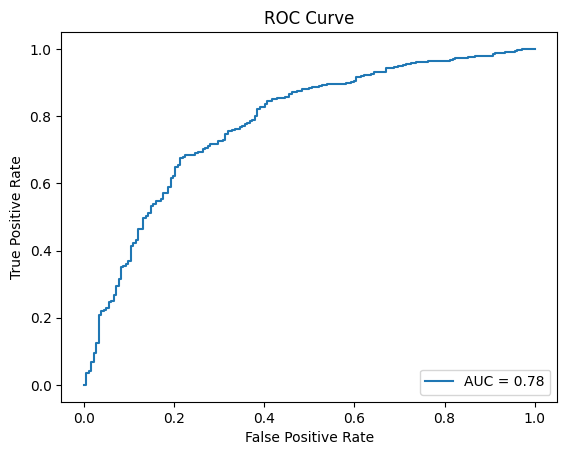

Class 0: Precision=0.54, Recall=0.20, F1=0.29
Class 1: Precision=0.86, Recall=0.96, F1=0.91
Accuracy: 0.8384
Confusion Matrix:
[[ 37 145]
 [ 32 881]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.20      0.29       182
           1       0.86      0.96      0.91       913

    accuracy                           0.84      1095
   macro avg       0.70      0.58      0.60      1095
weighted avg       0.81      0.84      0.81      1095

       Class 0   Class 1
0     0.134145  0.865855
1     0.029567  0.970433
2     0.166025  0.833975
3     0.163840  0.836160
4     0.107369  0.892631
...        ...       ...
1090  0.147994  0.852006
1091  0.113017  0.886983
1092  0.167575  0.832425
1093  0.161433  0.838567
1094  0.528191  0.471809

[1095 rows x 2 columns]
Coefficients:
   total_deals  deal_type  deal_start_date  contract_length  industry  \
0    -0.086768  -0.481769         0.029528         0.069406 -0.255254   

   usage_cycle

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support,
)
import pandas as pd
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression()


logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_proba)
# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
# Print AUC Score
print(f"AUC Score: {auc_score:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Class {i}: Precision={p:.2f}, Recall={r:.2f}, F1={f:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

probabilities = logreg.predict_proba(X_test_scaled)

probabilities_df = pd.DataFrame(probabilities, columns=["Class 0", "Class 1"])
print(probabilities_df)

coefficients = logreg.coef_

if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
    coef_df = pd.DataFrame(coefficients, columns=feature_names)
    print("Coefficients:")
    print(coef_df)
else:
    print("Coefficients:")
    print(coefficients)


AUC Score: 0.7820


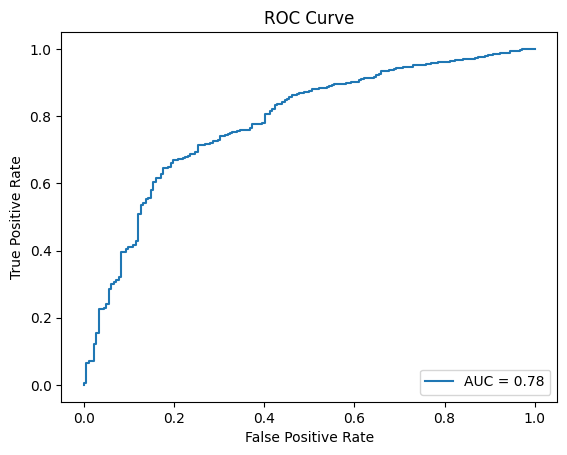

Accuracy: 0.7388
Confusion Matrix:
[[121  61]
 [225 688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.66      0.46       182
           1       0.92      0.75      0.83       913

    accuracy                           0.74      1095
   macro avg       0.63      0.71      0.64      1095
weighted avg       0.82      0.74      0.77      1095



In [212]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# The rest of your code remains the same
y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_proba)

# Print AUC Score
print(f"AUC Score: {auc_score:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [213]:
import statsmodels.api as sm
import numpy as np

X_train_with_intercept = sm.add_constant(X_train)

log_reg_model = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386021
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 4380
Model:                          Logit   Df Residuals:                     4360
Method:                           MLE   Df Model:                           19
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.1704
Time:                        19:39:32   Log-Likelihood:                -1690.8
converged:                       True   LL-Null:                       -2038.1
Covariance Type:            nonrobust   LLR p-value:                4.958e-135
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5942      0.492      3.242      0.001       0.630       2.558

2. REDUCED MODEL

True Negatives (TN): 90
False Positives (FP): 92
False Negatives (FN): 126
True Positives (TP): 787
Accuracy: 0.8009
Confusion Matrix:
[[ 90  92]
 [126 787]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.49      0.45       182
           1       0.90      0.86      0.88       913

    accuracy                           0.80      1095
   macro avg       0.66      0.68      0.67      1095
weighted avg       0.82      0.80      0.81      1095

       Class 0   Class 1
0     0.366454  0.633546
1     0.086001  0.913999
2     0.397163  0.602837
3     0.376577  0.623423
4     0.262569  0.737431
...        ...       ...
1090  0.365481  0.634519
1091  0.364703  0.635297
1092  0.410665  0.589335
1093  0.329321  0.670679
1094  0.801208  0.198792

[1095 rows x 2 columns]
AUC Score: 0.7674


C:\Users\Katerina Boshkoska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


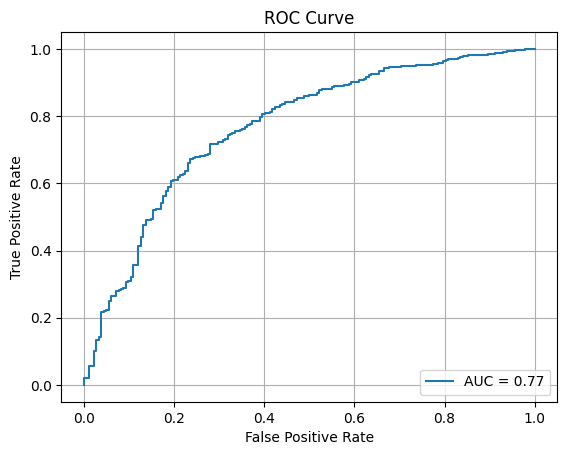

Model Coefficients:
[[-0.00044418 -0.0008406  -0.04562505  0.00074752  0.00059967  0.18462738]]
Coefficients with Feature Names:
   deal_type  industry  usage_cycle  account_age  customer_status  \
0  -0.000444 -0.000841    -0.045625     0.000748           0.0006   

   contribution_percent  
0              0.184627  


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)
import pandas as pd
import matplotlib.pyplot as plt

# Apply class_weight='balanced' to LogisticRegression
logreg = LogisticRegression(class_weight={0: 3}, random_state=42)

non_significant_features = result.pvalues[result.pvalues > 0.05].index

X_train_reduced = X_train.drop(columns=non_significant_features, errors='ignore')
X_test_reduced = X_test.drop(columns=non_significant_features, errors='ignore')

# Train the model
logreg.fit(X_train_reduced, y_train)

# Make predictions
y_pred = logreg.predict(X_test_reduced)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Predict probabilities for ROC curve
probabilities_df = pd.DataFrame(logreg.predict_proba(X_test_reduced), columns=["Class 0", "Class 1"])
print(probabilities_df)

# Calculate AUC Score
y_proba = logreg.predict_proba(X_test_reduced)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Display model coefficients
coefficients = logreg.coef_
print("Model Coefficients:")
print(coefficients)

# If the data is in a DataFrame, show coefficients with feature names
if isinstance(X_train_reduced, pd.DataFrame):
    feature_names = X_train_reduced.columns
    coef_df = pd.DataFrame(coefficients, columns=feature_names)
    print("Coefficients with Feature Names:")
    print(coef_df)

In [215]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

results = {}

for scaler_name, scaler in scalers.items():
    print(f"Testing with {scaler_name}...")
    
    if scaler is not None:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    logreg = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')
    logreg.fit(X_train_scaled, y_train)

    y_pred = logreg.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[scaler_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("-" * 50)

Testing with No Scaling...
Accuracy: 0.8365
Confusion Matrix:
[[ 33 149]
 [ 30 883]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.18      0.27       182
           1       0.86      0.97      0.91       913

    accuracy                           0.84      1095
   macro avg       0.69      0.57      0.59      1095
weighted avg       0.80      0.84      0.80      1095

--------------------------------------------------
Testing with StandardScaler...
Accuracy: 0.8356
Confusion Matrix:
[[ 31 151]
 [ 29 884]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.17      0.26       182
           1       0.85      0.97      0.91       913

    accuracy                           0.84      1095
   macro avg       0.69      0.57      0.58      1095
weighted avg       0.80      0.84      0.80      1095

--------------------------------------------------
Testing with MinMaxScale

In [216]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

results = {}
best_model = None
best_f1 = 0

for scaler_name, scaler in scalers.items():
    print(f"Testing with {scaler_name}...")

    if scaler is not None:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    logreg = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear', class_weight='balanced')
    logreg.fit(X_train_scaled, y_train)

    y_pred = logreg.predict(X_test_scaled)
    y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score
    auc = roc_auc_score(y_test, y_pred_prob)  # Calculate AUC score
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[scaler_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,  # Store F1 score
        "AUC": auc,  # Store AUC score
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")  # Print F1 score
    print(f"AUC Score: {auc:.4f}")  # Print AUC score
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("-" * 50)
    
    if f1 > best_f1:  # Compare F1 score instead of accuracy
        best_f1 = f1
        best_model = logreg

# Save the best model based on F1 score
joblib.dump(best_model, 'best_logreg_model.pkl')

# Optionally, print the best model and its F1 score
print(f"Best Model (based on F1 Score): {best_model}")
print(f"Best F1 Score: {best_f1:.4f}")


Testing with No Scaling...
Accuracy: 0.7388
F1 Score: 0.8277
AUC Score: 0.7821
Confusion Matrix:
[[122  60]
 [226 687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       182
           1       0.92      0.75      0.83       913

    accuracy                           0.74      1095
   macro avg       0.64      0.71      0.64      1095
weighted avg       0.83      0.74      0.77      1095

--------------------------------------------------
Testing with StandardScaler...
Accuracy: 0.7388
F1 Score: 0.8281
AUC Score: 0.7821
Confusion Matrix:
[[120  62]
 [224 689]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.66      0.46       182
           1       0.92      0.75      0.83       913

    accuracy                           0.74      1095
   macro avg       0.63      0.71      0.64      1095
weighted avg       0.82      0.74      0.77      1095

-----

Najdobar model:

Testing with MinMaxScaler...
True Negatives (TN): 121
False Positives (FP): 61
False Negatives (FN): 217
True Positives (TP): 696
Accuracy: 0.7461
F1 Score: 0.8335
AUC Score: 0.7858
Mean Cross-validation Accuracy: 0.7575
Confusion Matrix:
[[121  61]
 [217 696]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.66      0.47       182
           1       0.92      0.76      0.83       913

    accuracy                           0.75      1095
   macro avg       0.64      0.71      0.65      1095
weighted avg       0.83      0.75      0.77      1095

--------------------------------------------------
Predicted probabilities: [0.57392202 0.86127935 0.52097156 ... 0.53045754 0.54203524 0.179927  ]
Best Model (based on F1 Score): LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
Best F1 Score: 0.8335


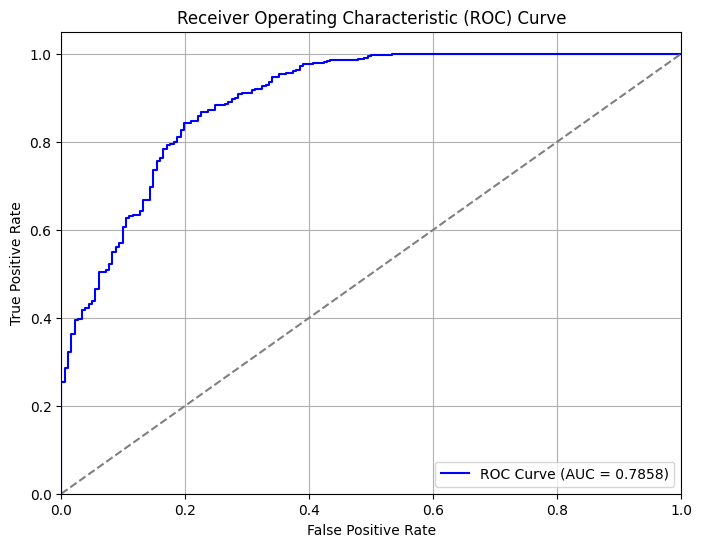

In [314]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

scalers = {"MinMaxScaler": MinMaxScaler()}

results = {}
best_model = None
best_f1 = 0

# Cross-validation setup
cv_folds = 5  # Number of folds

for scaler_name, scaler in scalers.items():
    print(f"Testing with {scaler_name}...")

    # Scaling the data
    if scaler is not None:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    logreg = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear', class_weight='balanced')

    # Cross-validation performance
    cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv_folds, scoring='accuracy')
    mean_cv_score = cv_scores.mean()

    # Train the model
    logreg.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = logreg.predict(X_test_scaled)
    y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Compute the confusion matrix values
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Print results
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")

    results[scaler_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": classification_report(y_test, y_pred),
        "Mean CV Accuracy": mean_cv_score
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Mean Cross-validation Accuracy: {mean_cv_score:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    print("Predicted probabilities:",  y_pred_prob)
    # Check if this model is the best one based on F1 score
    if f1 > best_f1:
        best_f1 = f1
        best_model = logreg

# Save the best model based on F1 score
if best_model:
    joblib.dump(best_model, 'best_logreg_model.pkl')

# Optionally, print the best model and its F1 score
print(f"Best Model (based on F1 Score): {best_model}")
print(f"Best F1 Score: {best_f1:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


kNN 

- FULL MODEL

In [218]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=50,weights='distance')

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8374
Confusion Matrix:
[[ 30 152]
 [ 26 887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.16      0.25       182
           1       0.85      0.97      0.91       913

    accuracy                           0.84      1095
   macro avg       0.69      0.57      0.58      1095
weighted avg       0.80      0.84      0.80      1095



- REDUCED

In [220]:
from sklearn.model_selection import cross_val_score
import numpy as np

feature_scores = []
for feature in X_train.columns:
    X_subset = X_train_scaled[:, X_train.columns != feature]
    scores = cross_val_score(knn, X_subset, y_train, cv=5)
    feature_scores.append(np.mean(scores))

for feature, score in zip(X_train.columns, feature_scores):
    print(f"{feature}: {score:.4f}")

total_deals: 0.8370
deal_type: 0.8274
deal_start_date: 0.8336
contract_length: 0.8338
industry: 0.8370
usage_cycle: 0.8326
active_deals: 0.8340
business_model: 0.8358
account_age: 0.8281
contract_value: 0.8352
total_discount: 0.8342
mrr: 0.8342
pricing_category: 0.8322
geographic_region: 0.8368
billing_location: 0.8349
customer_status: 0.8251
contribution_percent: 0.8349
payment_terms: 0.8342
payment_method: 0.8354


- CV AND GRID SEARCH

In [221]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

results = {}

for scaler_name, scaler in scalers.items():
    print(f"Testing with {scaler_name}...")

    # Scale the data
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Initialize KNN with class_weight='balanced'
    knn = KNeighborsClassifier(weights='distance')

    # Define the parameter grid
    param_grid = {'n_neighbors': range(1, 51)}

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=0,
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(X_train_scaled, y_train)

    # Get the best KNN model
    best_knn = grid_search.best_estimator_

    # Predict the outcomes
    y_pred = best_knn.predict(X_test_scaled)
    y_proba = best_knn.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)  # Calculate AUC
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score

    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results for comparison
    results[scaler_name] = {
        "Best Parameters": grid_search.best_params_,
        "Best CV Accuracy": grid_search.best_score_,
        "Test Accuracy": accuracy,
        "AUC Score": auc_score,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }
      # Compute the confusion matrix values
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Print results
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")

    # Print results
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("-" * 50)

print("\nScaler Comparison Results:")
for scaler_name, metrics in results.items():
    print(f"Scaler: {scaler_name}")
    print(f"  Best Parameters: {metrics['Best Parameters']}")
    print(f"  Best CV Accuracy: {metrics['Best CV Accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"  AUC Score: {metrics['AUC Score']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print("-" * 50)



Testing with MinMaxScaler...
True Negatives (TN): 44
False Positives (FP): 138
False Negatives (FN): 47
True Positives (TP): 866
Best Parameters: {'n_neighbors': 28}
Best Cross-Validation Accuracy: 0.8304
Test Set Accuracy: 0.8311
AUC Score: 0.7994
F1 Score: 0.9035
Confusion Matrix:
[[ 44 138]
 [ 47 866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.24      0.32       182
           1       0.86      0.95      0.90       913

    accuracy                           0.83      1095
   macro avg       0.67      0.60      0.61      1095
weighted avg       0.80      0.83      0.81      1095

--------------------------------------------------

Scaler Comparison Results:
Scaler: MinMaxScaler
  Best Parameters: {'n_neighbors': 28}
  Best CV Accuracy: 0.8304
  Test Accuracy: 0.8311
  AUC Score: 0.7994
  F1 Score: 0.9035
--------------------------------------------------


Najdobar model:

Testing without scaling...
True Negatives (TN): 86
False Positives (FP): 96
False Negatives (FN): 18
True Positives (TP): 895
Best Parameters: {'n_neighbors': 18}
Best Cross-Validation Accuracy: 0.8749
Cross-validation Accuracy Scores: [0.86872146 0.87785388 0.87671233 0.88127854 0.86986301]
Mean Cross-validation Accuracy: 0.8749
Test Set Accuracy: 0.8959
AUC Score: 0.8566
F1 Score: 0.9401
Confusion Matrix:
[[ 86  96]
 [ 18 895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60       182
           1       0.90      0.98      0.94       913

    accuracy                           0.90      1095
   macro avg       0.87      0.73      0.77      1095
weighted avg       0.89      0.90      0.88      1095

--------------------------------------------------

Results for No Scaling:
Best Parameters: {'n_neighbors': 18}
Best CV Accuracy: 0.8748858447488586
Cross-validation Accuracy Scores: [0.86872146 0.87785388 0.8767123

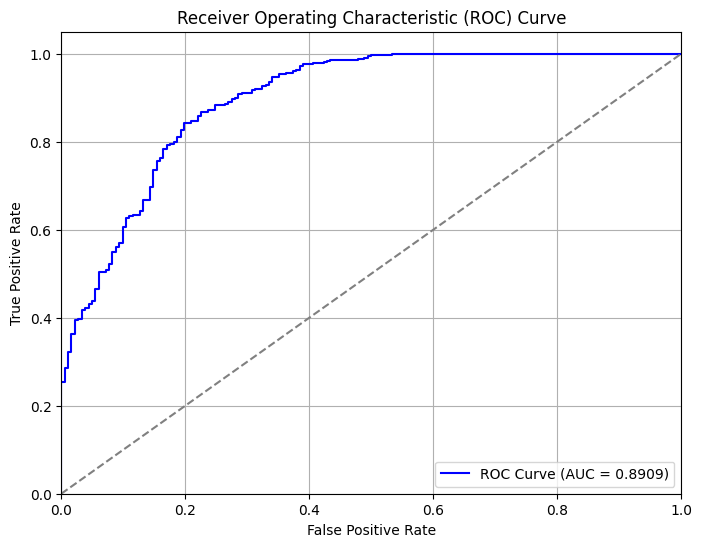

In [313]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import joblib

results = {}

# Skipping scaling and testing directly with the raw data
print(f"Testing without scaling...")

# Initialize KNN with class_weight='balanced'
knn = KNeighborsClassifier(weights='distance')

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 51)}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Fit the model to the raw (unscaled) data
grid_search.fit(X_train, y_train)

# Get the best KNN model from GridSearchCV
best_knn = grid_search.best_estimator_

# Save the best model using joblib
joblib.dump(best_knn, 'best_knn_model.pkl')

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')

# Get the predicted outcomes from the best model
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)  # Calculate AUC
f1 = f1_score(y_test, y_pred)  # Calculate F1 score

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Store results for comparison
results["No Scaling"] = {
    "Best Parameters": grid_search.best_params_,
    "Best CV Accuracy": grid_search.best_score_,
    "Cross-validation Accuracy Scores": cv_scores,
    "Mean Cross-validation Accuracy": cv_scores.mean(),
    "Test Accuracy": accuracy,
    "AUC Score": auc_score,
    "F1 Score": f1,
    "Confusion Matrix": conf_matrix,
    "Classification Report": class_report
}

# Compute the confusion matrix values
tn, fp, fn, tp = conf_matrix.ravel()

# Print results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("-" * 50)

# Optionally, print the results for further analysis
print("\nResults for No Scaling:")
for key, value in results["No Scaling"].items():
    print(f"{key}: {value}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


Naive Bayes

- FULL MODEL

In [223]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Naive Bayes model (GaussianNB for continuous data)
nb = GaussianNB()

# Train the model
nb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8082
Confusion Matrix:
[[ 48 134]
 [ 76 837]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.26      0.31       182
           1       0.86      0.92      0.89       913

    accuracy                           0.81      1095
   macro avg       0.62      0.59      0.60      1095
weighted avg       0.78      0.81      0.79      1095



CV AND GRID SEARCH

In [278]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class_counts = np.bincount(y_train)
priors = class_counts / class_counts.sum()
print(f"Computed Priors: {priors}")
# Create a pipeline with preprocessing and GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing: Standardize the data
    ('nb', GaussianNB(priors=priors))           # Gaussian Naive Bayes model
])

# Define the parameter grid (e.g., none for GaussianNB, only preprocess steps)
param_grid = {
    'scaler': [StandardScaler(), None]  # Check with or without scaling
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and CV results
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_

# Scale the test set and predict
y_pred = best_model.predict(X_test)

# Evaluate the test set performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Computed Priors: [0.1760274 0.8239726]
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ............................scaler=StandardScaler(); total time=   0.0s
[CV] END ............................scaler=StandardScaler(); total time=   0.0s
[CV] END ............................scaler=StandardScaler(); total time=   0.0s
[CV] END ............................scaler=StandardScaler(); total time=   0.0s
[CV] END ............................scaler=StandardScaler(); total time=   0.0s
[CV] END ........................................scaler=None; total time=   0.0s
[CV] END ........................................scaler=None; total time=   0.0s
[CV] END ........................................scaler=None; total time=   0.0s
[CV] END ........................................scaler=None; total time=   0.0s
[CV] END ........................................scaler=None; total time=   0.0s
Best parameters found: {'scaler': None}
Best cross-validation accuracy: 0.8043378995433791


Najdobar:

Cross-Validation Accuracy: 0.7600 ± 0.0116
Test Set Accuracy: 0.7717
AUC Score: 0.7666
Confusion Matrix:
[[101  81]
 [169 744]]
True Negatives (TN): 101
False Positives (FP): 81
False Negatives (FN): 169
True Positives (TP): 744
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.55      0.45       182
           1       0.90      0.81      0.86       913

    accuracy                           0.77      1095
   macro avg       0.64      0.68      0.65      1095
weighted avg       0.81      0.77      0.79      1095



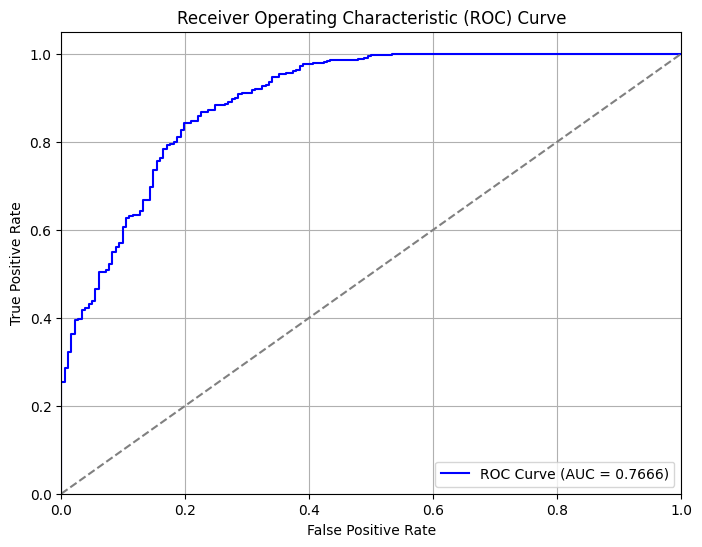

In [312]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib
import numpy as np

# Create a pipeline with preprocessing and GaussianNB with priors
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing: Standardize the data
    ('nb', GaussianNB(priors=[0.5, 0.5]))  # Gaussian Naive Bayes model with priors
])

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Fit the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(pipeline, 'best_nb_model.pkl')

# Predict class labels
y_pred = pipeline.predict(X_test)

# Predict probability estimates for the positive class (churn = 1)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Output results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")  # Added AUC calculation
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


DECISION TREE

- FULL MODEL

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test_scaled)
y_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)  # Calculate AUC score
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8712
AUC Score: 0.7864
Confusion Matrix:
[[120  62]
 [ 79 834]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       182
           1       0.93      0.91      0.92       913

    accuracy                           0.87      1095
   macro avg       0.77      0.79      0.78      1095
weighted avg       0.88      0.87      0.87      1095



- GRID SEARCH (PRUNING)

In [226]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you already have X_train and y_train

# Initialize the Decision Tree classifier with the best parameters
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)

# Optionally, scale the features if necessary (though it's not required for decision trees)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the training data
dt.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8959
Confusion Matrix:
[[106  76]
 [ 38 875]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       182
           1       0.92      0.96      0.94       913

    accuracy                           0.90      1095
   macro avg       0.83      0.77      0.79      1095
weighted avg       0.89      0.90      0.89      1095



In [228]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced', {0: 3, 1: 1}]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced', {0: 3, 1: 1}],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [229]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train_scaled is your training data and y_train is the target
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)  # Train the model

# Now you can access feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with actual feature names if X_train is a DataFrame
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)



                 Feature  Importance
9         contract_value    0.372223
8            account_age    0.207291
7         business_model    0.055161
10        total_discount    0.048156
11                   mrr    0.045019
2        deal_start_date    0.039027
4               industry    0.033611
16  contribution_percent    0.031671
0            total_deals    0.030445
14      billing_location    0.030155
15       customer_status    0.022877
3        contract_length    0.019684
13     geographic_region    0.015902
5            usage_cycle    0.011122
18        payment_method    0.009537
12      pricing_category    0.008236
1              deal_type    0.008180
6           active_deals    0.007409
17         payment_terms    0.004295


In [230]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming the feature importances are stored in a DataFrame (as you showed earlier)
# You can adjust this threshold or use top N features based on importance
important_features = ['contract_value', 'business_model', 'account_age', 'mrr', 
                      'total_discount', 'deal_start_date', 'billing_location', 
                      'contract_length', 'contribution_percent']

# Select only the important features from X_train and X_test
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Standardize the data (optional but helps improve performance in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_important)
X_test_scaled = scaler.transform(X_test_important)

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Train the DecisionTree model on the reduced feature set
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Test Set Accuracy: 0.8621
Confusion Matrix:
[[118  64]
 [ 87 826]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       182
           1       0.93      0.90      0.92       913

    accuracy                           0.86      1095
   macro avg       0.75      0.78      0.76      1095
weighted avg       0.87      0.86      0.87      1095



In [231]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_important, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Najdobar:

Cross-Validation Accuracy: 0.8676 ± 0.0056
Test Set Accuracy: 0.8630
Confusion Matrix:
[[127  55]
 [ 95 818]]
True Negatives (TN): 127
False Positives (FP): 55
False Negatives (FN): 95
True Positives (TP): 818
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       182
           1       0.94      0.90      0.92       913

    accuracy                           0.86      1095
   macro avg       0.75      0.80      0.77      1095
weighted avg       0.88      0.86      0.87      1095

AUC Score: 0.8909
Predicted probabilities: [0.90654206 0.90654206 0.98450813 ... 0.36645963 0.90654206 0.        ]


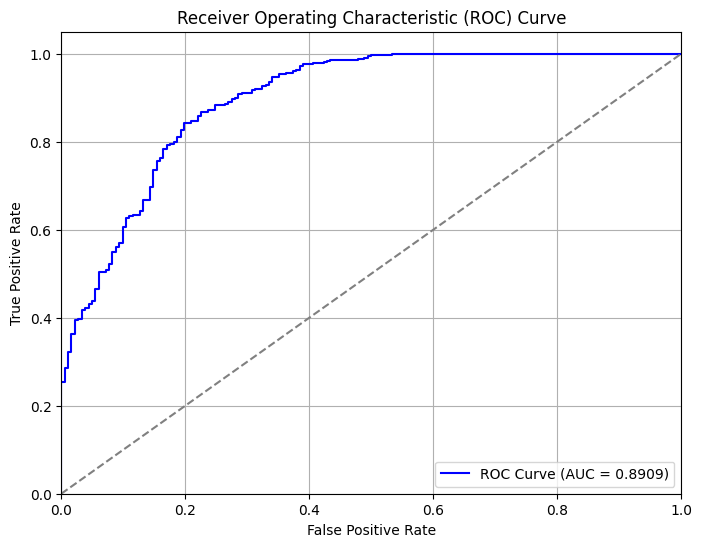

['best_dt_model.pkl']

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import joblib

# Initialize the Decision Tree classifier with the best parameters
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight={0: 2},  # Adjusted class weighting
    random_state=42
)

# No scaling needed for decision trees
X_train_processed = X_train_important  
X_test_processed = X_test_important  

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt, X_train_processed, y_train, cv=5, scoring='accuracy')

# Fit the model on the training data
dt.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test_processed)
y_prob = dt.predict_proba(X_test_processed)[:, 1]  # Probabilities for class 1

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)  # AUC score

# Output results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc:.4f}")

print("Predicted probabilities:", y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

# Save the model
joblib.dump(dt, 'best_dt_model.pkl')

- CV

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you already have X_train and y_train

# Initialize the Decision Tree classifier with the best parameters
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Optionally, scale the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply cross-validation
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of CV accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.8847032  0.89497717 0.89269406 0.89155251 0.86415525]
Mean CV accuracy: 0.8856
Standard deviation of CV accuracy: 0.0113


In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the data (optional but helps improve performance in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[important_features])
X_test_scaled = scaler.transform(X_test[important_features])

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation on the reduced feature set (5-fold by default)
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV accuracy: {np.std(cv_scores):.4f}")

Cross-validation accuracy scores: [0.8847032  0.90296804 0.90296804 0.90410959 0.89269406]
Mean CV accuracy: 0.8975
Standard deviation of CV accuracy: 0.0076


BAGGING

Najdobar:

Cross-Validation Accuracy: 0.9071 ± 0.0101
Test Set Accuracy: 0.9196
Confusion Matrix:
[[114  68]
 [ 20 893]]
True Negatives (TN): 114
False Positives (FP): 68
False Negatives (FN): 20
True Positives (TP): 893
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       182
           1       0.93      0.98      0.95       913

    accuracy                           0.92      1095
   macro avg       0.89      0.80      0.84      1095
weighted avg       0.92      0.92      0.91      1095

AUC Score: 0.9159


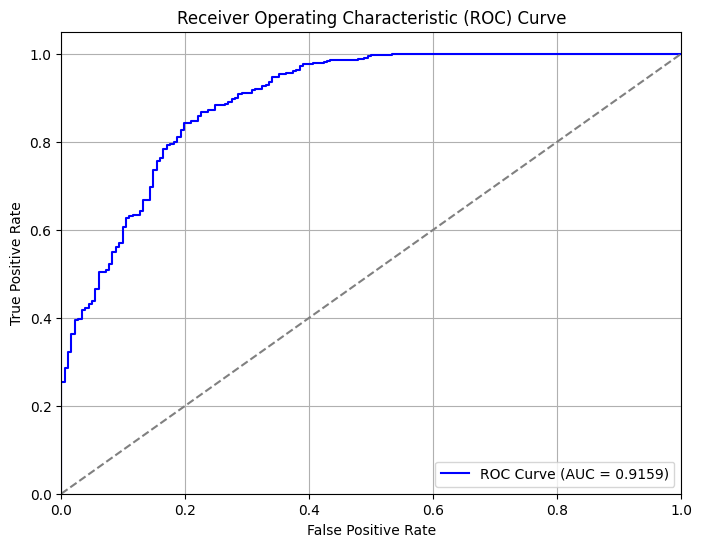

In [309]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Bagging model using the Decision Tree as the base estimator
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)

# Train the model
bagging.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = bagging.predict(X_test_scaled)
y_proba = bagging.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)  # AUC score

# Output results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc:.4f}")


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()



In [236]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Bagging model using the Decision Tree as the base estimator
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Train the model on the entire training set
bagging.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = bagging.predict(X_test_scaled)
y_proba = bagging.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Cross-Validation Accuracy: 0.9011 ± 0.0073
Test Set Accuracy: 0.9196
AUC Score: 0.9159
Confusion Matrix:
[[114  68]
 [ 20 893]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       182
           1       0.93      0.98      0.95       913

    accuracy                           0.92      1095
   macro avg       0.89      0.80      0.84      1095
weighted avg       0.92      0.92      0.91      1095



- GRID SEARCH AND CV

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging model with DecisionTreeClassifier as the estimator (instead of base_estimator)
bagging = BaggingClassifier(estimator=tree, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [10],  # Number of base estimators
    'max_samples': [0.7],      # Fraction of samples used for each base estimator
    'estimator__max_depth': [7],  # Max depth for base estimator (DecisionTree)
    'estimator__min_samples_split': [2],  # Minimum samples to split a node in DecisionTree
    'estimator__min_samples_leaf': [4]  # Minimum samples per leaf in DecisionTree
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best parameters: {'estimator__max_depth': 7, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 2, 'max_samples': 0.7, 'n_estimators': 10}
Test Set Accuracy: 0.9105
Confusion Matrix:
[[106  76]
 [ 22 891]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       182
           1       0.92      0.98      0.95       913

    accuracy                           0.91      1095
   macro avg       0.87      0.78      0.82      1095
weighted avg       0.91      0.91      0.90      1095



RANDOM FOREST

- FULL MODEL

In [238]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9114
Confusion Matrix:
[[ 96  86]
 [ 11 902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.66       182
           1       0.91      0.99      0.95       913

    accuracy                           0.91      1095
   macro avg       0.91      0.76      0.81      1095
weighted avg       0.91      0.91      0.90      1095



- GRID SEARCH AND CV

Najdobar:

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Cross-Validation Accuracy: 0.9071 ± 0.0101
Test Set Accuracy: 0.9151
Confusion Matrix:
[[108  74]
 [ 19 894]]
True Negatives (TN): 108
False Positives (FP): 74
False Negatives (FN): 19
True Positives (TP): 894
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.59      0.70       182
           1       0.92      0.98      0.95       913

    accuracy                           0.92      1095
   macro avg       0.89      0.79      0.82      1095
weighted avg       0.91      0.92      0.91      1095

AUC Score: 0.9169


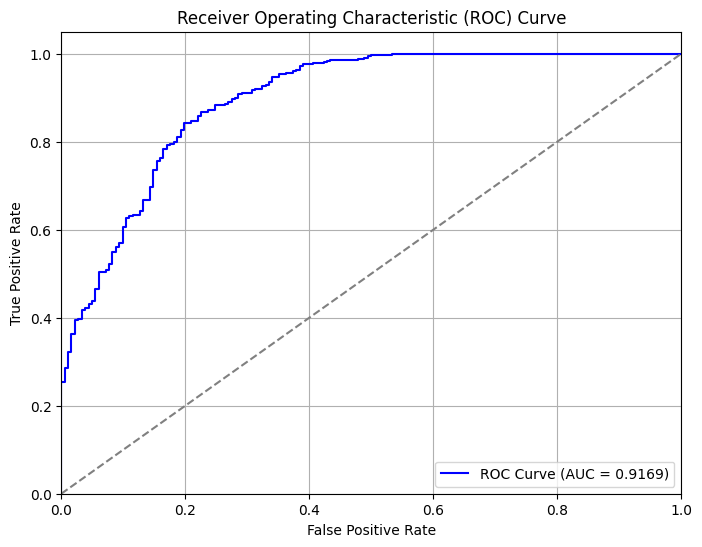

In [308]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib

# Initialize the RandomForestClassifier with class weights
rf = RandomForestClassifier(random_state=42, class_weight={0: 1.663, 1: 0.715})

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],  # Test multiple values for n_estimators
    'max_depth': [None],  # Test various max depths
    'min_samples_split': [10],  # Try different values for min_samples_split
    'min_samples_leaf': [1],  # Test different values for min_samples_leaf
    'max_features': ['sqrt'],  # Test multiple strategies for max_features
    'bootstrap': [True],  # Test both True and False for bootstrap
}

# Apply GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model from GridSearchCV
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
cv_score = grid_search.best_score_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)  # AUC score

# Output results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc:.4f}")


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()



BOOSTING

        ADABOOST

- FULL MODEL

In [240]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)


adaboost.fit(X_train_scaled, y_train)


y_pred = adaboost.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

C:\Users\Katerina Boshkoska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9151
Confusion Matrix:
[[108  74]
 [ 19 894]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.59      0.70       182
           1       0.92      0.98      0.95       913

    accuracy                           0.92      1095
   macro avg       0.89      0.79      0.82      1095
weighted avg       0.91      0.92      0.91      1095



- FEATURE IMPORTANCE - REDUCED MODEL

In [267]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_sample_weight

# Standardize the data (optional but recommended for improved performance)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Fit the model with sample weights
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the AdaBoost model (no need to specify base_estimator, default is a DecisionTreeClassifier)
adaboost = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=42)


# Train the model using the training set
adaboost.fit(X_train_scaled, y_train,sample_weights)

# Feature importance
feature_importances = adaboost.feature_importances_

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Define the threshold below which features will be dropped (for example, keep only features with importance >= 0.01)
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Identify dropped features
dropped_features = set(X_train.columns) - set(important_features)

# Print which features were dropped
print("\nDropped Features:")
print(dropped_features)

# Filter X_train and X_test to keep only the important features
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Retrain the AdaBoost model on the filtered features
adaboost.fit(X_train_filtered, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test_filtered)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"\nAccuracy after feature selection: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)




Feature Importances:
                 Feature  Importance
9         contract_value    0.545539
8            account_age    0.198508
4               industry    0.096006
15       customer_status    0.088620
7         business_model    0.048286
11                   mrr    0.011635
16  contribution_percent    0.011406
17         payment_terms    0.000000
14      billing_location    0.000000
13     geographic_region    0.000000
12      pricing_category    0.000000
0            total_deals    0.000000
10        total_discount    0.000000
1              deal_type    0.000000
6           active_deals    0.000000
5            usage_cycle    0.000000
3        contract_length    0.000000
2        deal_start_date    0.000000
18        payment_method    0.000000

Dropped Features:
{'total_deals', 'deal_type', 'active_deals', 'contract_length', 'usage_cycle', 'billing_location', 'total_discount', 'payment_method', 'geographic_region', 'pricing_category', 'deal_start_date', 'payment_terms'}

Accura

Najdobar:

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\Katerina Boshkoska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Best Parameters from GridSearchCV: {'learning_rate': 1.0, 'n_estimators': 200}
Cross-Validation Accuracy  Score: 0.8986
Cross-Validation Accuracy: 0.9071 ± 0.0101
Test Set Accuracy: 0.9151
Confusion Matrix:
[[109  73]
 [ 20 893]]
True Negatives (TN): 109
False Positives (FP): 73
False Negatives (FN): 20
True Positives (TP): 893
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       182
           1       0.92      0.98      0.95       913

    accuracy                           0.92      1095
   macro avg       0.88      0.79      0.83      1095
weighted avg       0.91      0.92      0.91      1095

AUC Score: 0.8936


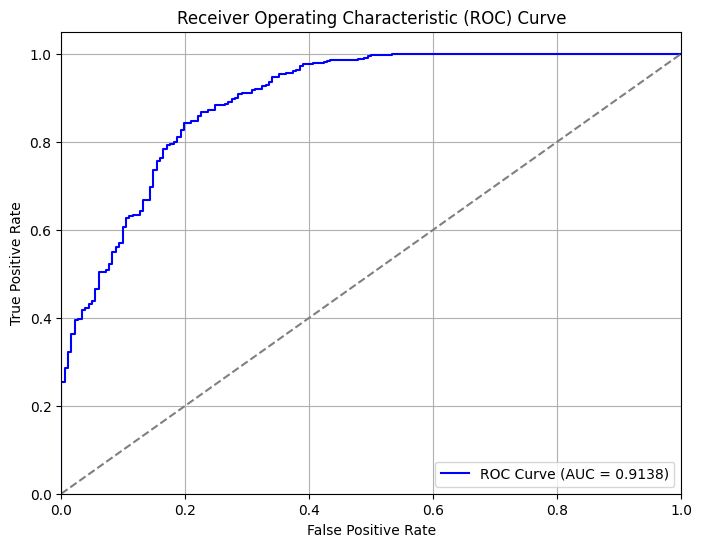

In [306]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [200],  # Number of boosting rounds
    'learning_rate': [1.0],  # Learning rate
}

# Apply GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',  # Optimizing for recall
    verbose=2
)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_

# Print the best parameters and cross-validation score
print("\nBest Parameters from GridSearchCV:", best_params)
print(f"Cross-Validation Accuracy  Score: {cv_score:.4f}")

# Evaluate the Best Model on the Test Set
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_probs)

# Output the evaluation results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.4f}")


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

      GRADIENT BOOSTING

- FULL MODEL

In [243]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model using the training set
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9169
Confusion Matrix:
[[ 99  83]
 [  8 905]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.54      0.69       182
           1       0.92      0.99      0.95       913

    accuracy                           0.92      1095
   macro avg       0.92      0.77      0.82      1095
weighted avg       0.92      0.92      0.91      1095



FEATURE IMPORTANCE

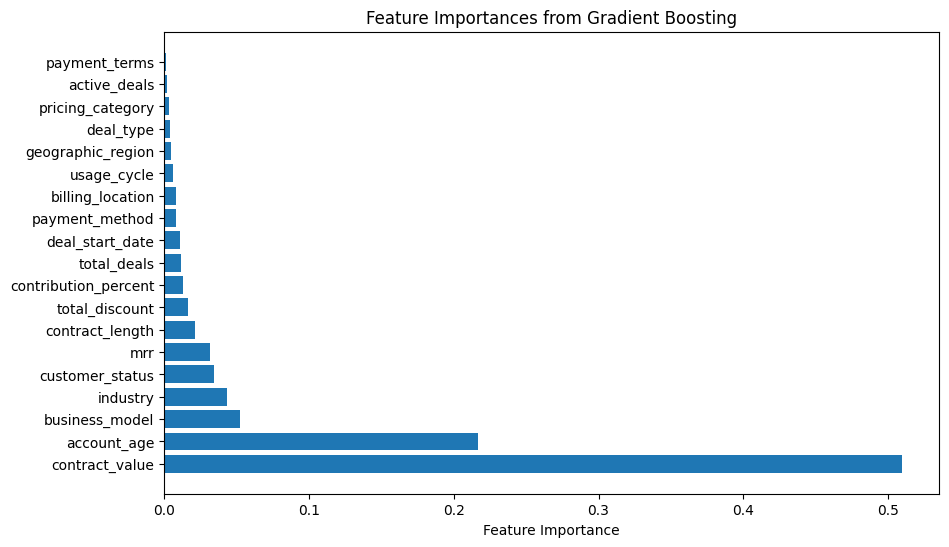

contract_value: 0.5098
account_age: 0.2165
business_model: 0.0526
industry: 0.0431
customer_status: 0.0344
mrr: 0.0318
contract_length: 0.0214
total_discount: 0.0166
contribution_percent: 0.0132
total_deals: 0.0119
deal_start_date: 0.0108
payment_method: 0.0084
billing_location: 0.0083
usage_cycle: 0.0062
geographic_region: 0.0046
deal_type: 0.0043
pricing_category: 0.0033
active_deals: 0.0017
payment_terms: 0.0010


In [244]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Fit the model to the training data
gradient_boosting.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = gradient_boosting.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Gradient Boosting")
plt.show()

# Print sorted feature importances
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importances[i]:.4f}")


- REDUCED MODEL

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Set a threshold for feature importance (for example, keep features with importance > 0.01)
threshold = 0.01

# Get the feature importances from the Gradient Boosting model
feature_importances = gradient_boosting.feature_importances_

# Identify features to keep based on the threshold
important_features_idx = np.where(feature_importances > threshold)[0]

# Get the columns of the features to keep
X_train_important = X_train.iloc[:, important_features_idx]
X_test_important = X_test.iloc[:, important_features_idx]

# Print the names of the features that are kept
kept_features = X_train.columns[important_features_idx]
print("Kept Features based on importance:")
print(kept_features)

# Re-train the Gradient Boosting model with the important features
gradient_boosting.fit(X_train_important, y_train)

# Evaluate the model again
y_pred = gradient_boosting.predict(X_test_important)

# Evaluate the performance of the model with the reduced set of features
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy after feature selection: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Kept Features based on importance:
Index(['total_deals', 'deal_start_date', 'contract_length', 'industry',
       'business_model', 'account_age', 'contract_value', 'total_discount',
       'mrr', 'customer_status', 'contribution_percent'],
      dtype='object')
Accuracy after feature selection: 0.9132
Confusion Matrix:
[[102  80]
 [ 15 898]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.56      0.68       182
           1       0.92      0.98      0.95       913

    accuracy                           0.91      1095
   macro avg       0.89      0.77      0.82      1095
weighted avg       0.91      0.91      0.91      1095



Najdobar:

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters from GridSearchCV: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Cross-Validation Accuracy: 0.8904 ± 0.0105
Test Set Accuracy: 0.9169
Confusion Matrix:
[[102  80]
 [ 11 902]]
True Negatives (TN): 102
False Positives (FP): 80
False Negatives (FN): 11
True Positives (TP): 902
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       182
           1       0.92      0.99      0.95       913

    accuracy                           0.92      1095
   macro avg       0.91      0.77      0.82      1095
weighted avg       0.92      0.92      0.91      1095

AUC Score: 0.9215
Cross-validation accuracy scores: [0.90068493 0.92351598 0.90296804 0.91324201 0.89497717]
Mean cross-validation accuracy: 0.9071


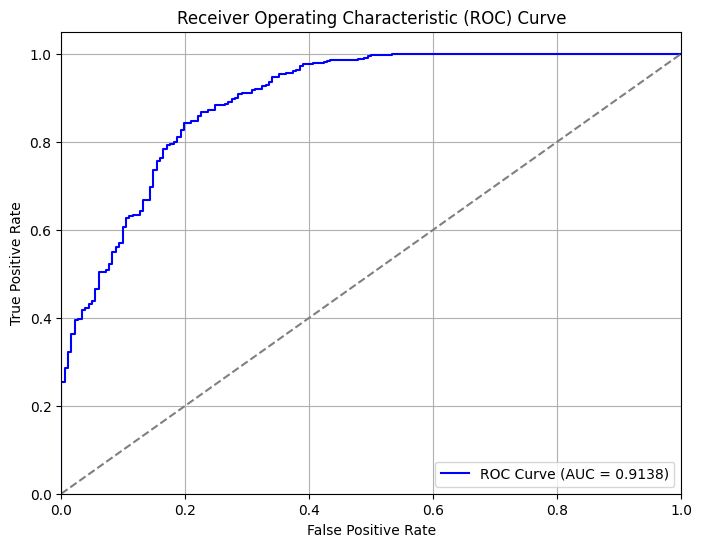

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# List of important features (based on previous feature importance analysis)
important_features = ['deal_type', 'deal_start_date', 'contract_length', 'industry',
       'business_model', 'account_age', 'contract_value', 'total_discount',
       'mrr', 'customer_status', 'contribution_percent']

# Select only the important features from the original dataset
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Initialize the GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200],  # Number of boosting stages
    'learning_rate': [0.05],  # Step size shrinking
    'max_depth': [3],  # Maximum depth of the individual estimators
    'subsample': [0.8],  # Fraction of samples used for fitting each base estimator
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Standardize the data (recommended for Gradient Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters from GridSearchCV: {best_params}")

# Best model after GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
y_probab = best_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_probab)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.4f}")

# Cross-validation on the reduced dataset (5-fold)
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

# Best hyperparameters from GridSearchCV
best_params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

# Initialize the GradientBoostingClassifier with the best parameters
gb_model = GradientBoostingClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=42
)

# Fit the model on the training data (assuming X_train_reduced and y_train are ready)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)
class_report = classification_report(y_test, y_pred_gb)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9178
Confusion Matrix:
[[104  78]
 [ 12 901]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       182
           1       0.92      0.99      0.95       913

    accuracy                           0.92      1095
   macro avg       0.91      0.78      0.83      1095
weighted avg       0.92      0.92      0.91      1095



      XGBOOST 

In [248]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\Katerina Boshkoska\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


- FULL MODEL

In [249]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are already available

# Standardize the data (optional but helps improve performance in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgboost = XGBClassifier(n_estimators=100, random_state=42)

# Train the model using the training set
xgboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgboost.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9105
Confusion Matrix:
[[110  72]
 [ 26 887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       182
           1       0.92      0.97      0.95       913

    accuracy                           0.91      1095
   macro avg       0.87      0.79      0.82      1095
weighted avg       0.91      0.91      0.91      1095



- FEATURE IMPORTANCE

Feature Importances:
                 Feature  Importance
9         contract_value    0.198850
7         business_model    0.099488
8            account_age    0.086123
15       customer_status    0.082196
3        contract_length    0.056919
4               industry    0.056361
11                   mrr    0.050078
5            usage_cycle    0.044610
6           active_deals    0.036654
1              deal_type    0.033259
10        total_discount    0.032366
13     geographic_region    0.031729
0            total_deals    0.031362
18        payment_method    0.030490
16  contribution_percent    0.028983
2        deal_start_date    0.028978
14      billing_location    0.027832
12      pricing_category    0.023709
17         payment_terms    0.020012
Accuracy after dropping least important features: 0.9078
Confusion Matrix:
[[112  70]
 [ 31 882]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       182
         

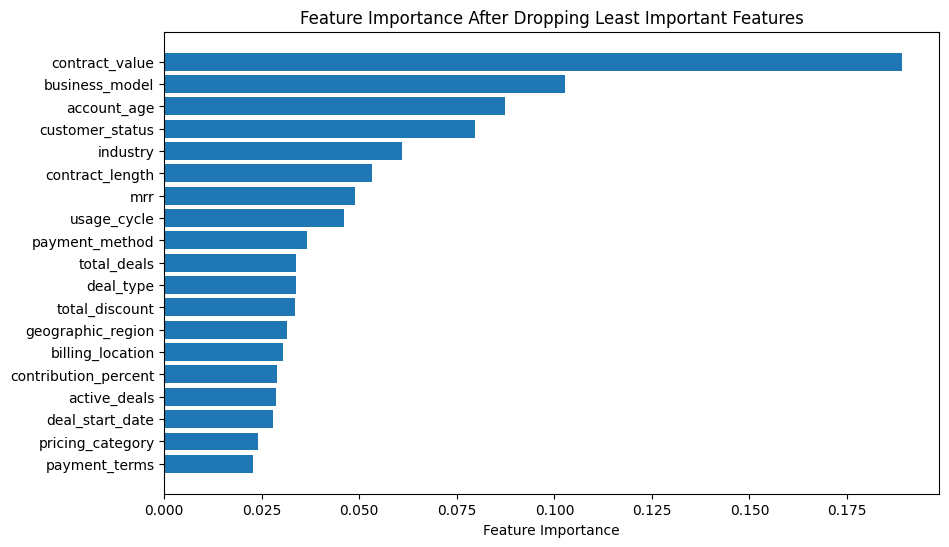

In [250]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train and y_train are your training data
# Train the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgboost_model.feature_importances_

# Create a DataFrame to store feature names and their importance values
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importances:")
print(feature_df)

# Drop the least important features based on the threshold
threshold = 0.01  # You can adjust this threshold value
important_features = feature_df[feature_df['Importance'] > threshold]['Feature'].values

# Create new X_train and X_test with the selected features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the XGBoost model on the reduced feature set
xgboost_model_reduced = xgb.XGBClassifier(random_state=42)
xgboost_model_reduced.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_reduced = xgboost_model_reduced.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_reduced)
conf_matrix = confusion_matrix(y_test, y_pred_reduced)
class_report = classification_report(y_test, y_pred_reduced)

# Output the evaluation results
print(f"Accuracy after dropping least important features: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Optional: Plot feature importances again for the reduced model
reduced_feature_importances = xgboost_model_reduced.feature_importances_
reduced_feature_df = pd.DataFrame({
    'Feature': important_features,
    'Importance': reduced_feature_importances
})

# Sort the features by importance
reduced_feature_df = reduced_feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(reduced_feature_df['Feature'], reduced_feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance After Dropping Least Important Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

GRID SEARCH AND CV

Najdobar:

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from GridSearchCV:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation accuracy: 0.9100
Cross-Validation Accuracy: 0.8904 ± 0.0105
Test Set Accuracy: 0.9151
Confusion Matrix:
[[102  80]
 [ 13 900]]
True Negatives (TN): 102
False Positives (FP): 80
False Negatives (FN): 13
True Positives (TP): 900
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69       182
           1       0.92      0.99      0.95       913

    accuracy                           0.92      1095
   macro avg       0.90      0.77      0.82      1095
weighted avg       0.91      0.92      0.91      1095

AUC Score: 0.9138


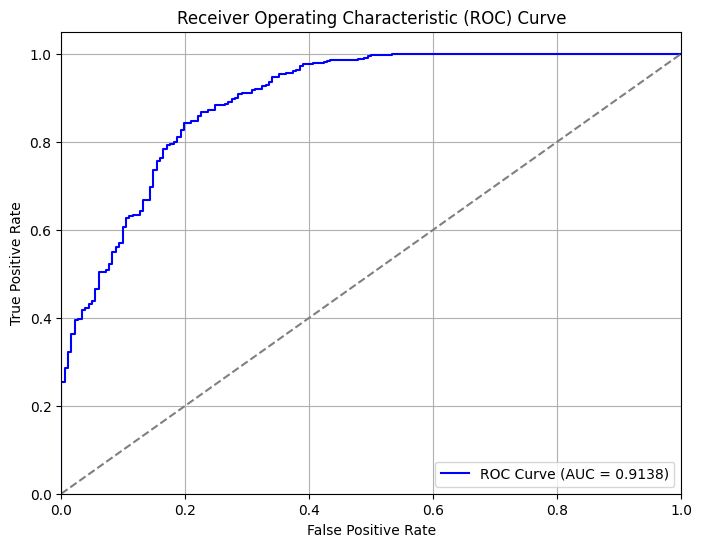

['best_xgboost_model.pkl']

In [304]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import joblib  # To save the model

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_child_weight': [1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_reduced, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters from GridSearchCV:")
print(best_params)
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Retrain the model using the best parameters found from GridSearchCV
best_xgboost_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_reduced = best_xgboost_model.predict(X_test_reduced)
y_pred_prob = best_xgboost_model.predict_proba(X_test_reduced)[:, 1]  # Probabilities for class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_reduced)
conf_matrix = confusion_matrix(y_test, y_pred_reduced)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred_reduced)
roc_auc = roc_auc_score(y_test, y_pred_prob)  # Calculate AUC score

# Output the evaluation results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

# Save the best XGBoost model using joblib
joblib.dump(best_xgboost_model, 'best_xgboost_model.pkl')

STACKING

- FULL MODEL

Najdobar:

Cross-Validation Accuracy: 0.8904 ± 0.0105
Test Set Accuracy: 0.9196
Confusion Matrix:
[[106  76]
 [ 12 901]]
True Negatives (TN): 106
False Positives (FP): 76
False Negatives (FN): 12
True Positives (TP): 901
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.71       182
           1       0.92      0.99      0.95       913

    accuracy                           0.92      1095
   macro avg       0.91      0.78      0.83      1095
weighted avg       0.92      0.92      0.91      1095

AUC Score: 0.9245


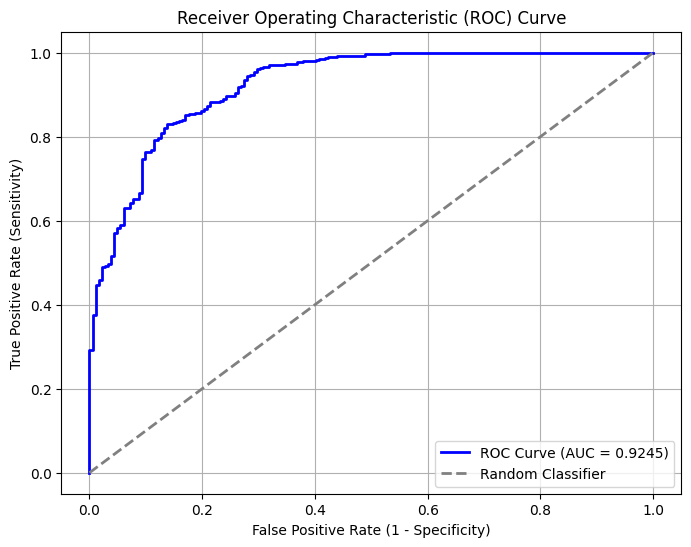

['stacking_model.pkl']

In [299]:
import joblib
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Load previously saved models
best_rf = joblib.load('best_rf_model.pkl')
best_dt = joblib.load('best_dt_model.pkl')
best_xgboost_model = joblib.load('best_xgboost_model.pkl')

# Meta-learner (Logistic Regression)
meta_learner = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

# Base learners (weak learners) loaded from saved models
estimators = [
    ('rf', best_rf),
    ('dt', best_dt),
    ('xgb', best_xgboost_model)
]

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)
y_prob = stacking_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Evaluate the model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Classifier')

# Labels and title
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Save the stacking model
joblib.dump(stacking_model, 'stacking_model.pkl')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters from GridSearchCV: {'final_estimator__C': 0.1, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'liblinear'}
Cross-validation accuracy scores: [0.8847032  0.90296804 0.90182648 0.8869863  0.87557078]
Mean cross-validation accuracy: 0.8904
Cross-Validation Accuracy: 0.8904 ± 0.0105
Test Set Accuracy: 0.9078
Confusion Matrix:
[[100  82]
 [ 19 894]]
True Negatives (TN): 100
False Positives (FP): 82
False Negatives (FN): 19
True Positives (TP): 894
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.55      0.66       182
           1       0.92      0.98      0.95       913

    accuracy                           0.91      1095
   macro avg       0.88      0.76      0.81      1095
weighted avg       0.90      0.91      0.90      1095

AUC Score: 0.9029


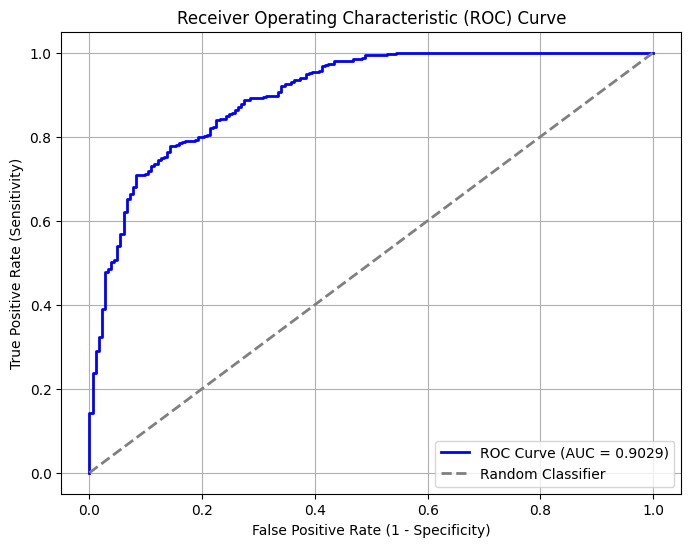

['stacking_model_with_cv_and_gridsearch.pkl']

In [297]:
import joblib
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load previously saved models
best_knn = joblib.load('best_knn_model.pkl')
best_dt = joblib.load('best_dt_model.pkl')
best_nb = joblib.load('best_nb_model.pkl')

# Meta-learner (Logistic Regression)
meta_learner = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

# Base learners (weak learners) loaded from saved models
estimators = [
    ('knn', best_knn),
    ('dt', best_dt),
    ('nb', best_nb)
]

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner
)

# Define the parameter grid for GridSearchCV (optional hyperparameter tuning)
param_grid = {
    'final_estimator__C': [0.1, 1.0, 10.0],  # Hyperparameters for the meta-learner (Logistic Regression)
    'final_estimator__penalty': ['l1', 'l2'],  # Penalty types for Logistic Regression
    'final_estimator__solver': ['liblinear', 'saga']  # Solvers for Logistic Regression
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters from GridSearchCV: {best_params}")

# Cross-validation on the best model found by GridSearchCV
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Make predictions using the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Classifier')

# Labels and title
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Save the best stacking model
joblib.dump(best_model, 'stacking_model_with_cv_and_gridsearch.pkl')


In [290]:
from sklearn.ensemble import RandomForestClassifier

# Meta-learner (Random Forest Classifier)
meta_learner = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Base learners (weak learners) loaded from saved models
estimators = [
    ('knn', best_knn),
    ('dt', best_dt),
    ('xgb', best_xgboost_model)
]

# Create the stacking model with the new meta-learner
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner
)

# Define the parameter grid for GridSearchCV (optional hyperparameter tuning)
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'final_estimator__max_depth': [3, 5, 10],  # Maximum depth of trees
    'final_estimator__min_samples_split': [2, 5],  # Minimum samples required to split a node
    'final_estimator__min_samples_leaf': [1, 2],  # Minimum samples required at leaf nodes
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters from GridSearchCV: {best_params}")

# Cross-validation on the best model found by GridSearchCV
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Make predictions using the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
class_report = classification_report(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("Classification Report:")
print(class_report)
print(f"AUC Score: {auc_score:.4f}")

# Save the best stacking model
joblib.dump(best_model, 'stacking_model_with_rf_meta.pkl')
print("Stacking model with Random Forest meta-learner saved!")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters from GridSearchCV: {'final_estimator__max_depth': 5, 'final_estimator__min_samples_leaf': 2, 'final_estimator__min_samples_split': 2, 'final_estimator__n_estimators': 200}
Cross-validation accuracy scores: [0.90525114 0.91210046 0.90981735 0.9086758  0.90410959]
Mean cross-validation accuracy: 0.9080
Cross-Validation Accuracy: 0.9080 ± 0.0029
Test Set Accuracy: 0.9187
Confusion Matrix:
[[106  76]
 [ 13 900]]
True Negatives (TN): 106
False Positives (FP): 76
False Negatives (FN): 13
True Positives (TP): 900
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       182
           1       0.92      0.99      0.95       913

    accuracy                           0.92      1095
   macro avg       0.91      0.78      0.83      1095
weighted avg       0.92      0.92      0.91      1095

AUC Score: 0.9177
Stacking model with Random Forest met